# Kelompok Timothy Ray
* 1119003 Levin Martinus Budiarto
* 1119005 – Aristo Demos
* 1119006 – William Juniar
* 1119007 - Timothy Ray
* 1119009 - Julian
* 1119011 – Andreas Virdian

In [2]:
import pandas as pd
import numpy as np
import nltk, re, string
import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn import svm

In [3]:
pd.set_option('display.max_rows', None)

## Load
Data yang digunakan diambil dari Twitter menggunakan API Twitter yang disimpan ke dalam dataset jokowi_twitter_sentiment.csv

In [4]:
df = pd.read_csv('jokowi_twitter_sentiment.csv')

Pemberian label akan dilakukan secara manual dan lexicon-based.
Di bawah ini akan dilakukan load data label manual dari txt

In [6]:
with open('jokowi_twitter_sentiment_labeled.txt', 'r') as file:
    label = file.read().splitlines()
df['label'] = label
df

,Unnamed: 0,id,text,created_at,label
0,0,1495415872164229120,RT @LurahIstana: Jokowi sudah mengesahkan pera...,2022-02-20T15:11:42.000Z,Positive
1,1,1495415869673177090,RT @NabilaAr__: Kami para santri sangat tepat ...,2022-02-20T15:11:41.000Z,Positive
2,2,1495415863377539074,RT @Sangkuriang5551: FOKUS KE JOKOWI!\n\nMasal...,2022-02-20T15:11:39.000Z,Negative
3,3,1495415855546798083,RT @jokowi: Srikandi-srikandi bulutangkis putr...,2022-02-20T15:11:38.000Z,Positive
4,4,1495415849015930880,RT @CasanovaX8X: LOMBOK #MandalikaCircuit\n#Jo...,2022-02-20T15:11:36.000Z,Neutral
5,5,1495415838991859713,RT @geloraco: BPJS Kesehatan Jadi Syarat Jual ...,2022-02-20T15:11:34.000Z,Negative
6,6,1495415827960516623,RT @KangUtang04: #JokowiTheRealDictator \n#Jok...,2022-02-20T15:11:31.000Z,Negative
7,7,1495415826912264194,RT @kompascom: Hasil 71 persen tersebut merupa...,2022-02-20T15:11:31.000Z,Positive
8,8,1495415825309724675,RT @LurahIstana: Jokowi sudah mengesahkan pera...,2022-02-20T15:11:30.000Z,Neutral
9,9,1495415817768300546,RT @OposisiCerdas: Tidak Hanya Jual-beli Tanah...,2022-02-20T15:11:29.000Z,Negative


## Drop duplicate

In [7]:
clean_df = df[df['text'].duplicated()==False]
clean_df.reset_index(inplace=True)
clean_df

,index,Unnamed: 0,id,text,created_at,label
0,0,0,1495415872164229120,RT @LurahIstana: Jokowi sudah mengesahkan pera...,2022-02-20T15:11:42.000Z,Positive
1,1,1,1495415869673177090,RT @NabilaAr__: Kami para santri sangat tepat ...,2022-02-20T15:11:41.000Z,Positive
2,2,2,1495415863377539074,RT @Sangkuriang5551: FOKUS KE JOKOWI!\n\nMasal...,2022-02-20T15:11:39.000Z,Negative
3,3,3,1495415855546798083,RT @jokowi: Srikandi-srikandi bulutangkis putr...,2022-02-20T15:11:38.000Z,Positive
4,4,4,1495415849015930880,RT @CasanovaX8X: LOMBOK #MandalikaCircuit\n#Jo...,2022-02-20T15:11:36.000Z,Neutral
5,5,5,1495415838991859713,RT @geloraco: BPJS Kesehatan Jadi Syarat Jual ...,2022-02-20T15:11:34.000Z,Negative
6,6,6,1495415827960516623,RT @KangUtang04: #JokowiTheRealDictator \n#Jok...,2022-02-20T15:11:31.000Z,Negative
7,7,7,1495415826912264194,RT @kompascom: Hasil 71 persen tersebut merupa...,2022-02-20T15:11:31.000Z,Positive
8,9,9,1495415817768300546,RT @OposisiCerdas: Tidak Hanya Jual-beli Tanah...,2022-02-20T15:11:29.000Z,Negative
9,10,10,1495415816275505155,RT @CNNIndonesia: Survei Indikator: 70 Persen ...,2022-02-20T15:11:28.000Z,Positive


In [8]:
tweets = clean_df['text'].to_numpy(dtype='str')
tweets

array(['RT @LurahIstana: Jokowi sudah mengesahkan peraturan wajib BPJS yg akan diterapkan dalam segala aspek baik pengurusan surat surat dan perjua…',
       'RT @NabilaAr__: Kami para santri sangat tepat dlm memilih Bpk Erick Thohir sbg penerus Presiden Jokowi. Indonesia sangat membutuhkan pemimp…',
       'RT @Sangkuriang5551: FOKUS KE JOKOWI!\n\nMasalah bukan di Mentan, Mendikbud, Menag, Menhan, Menaker, Mendag . . Masalah ada pada Jokowi.\n\nHAN…',
       'RT @jokowi: Srikandi-srikandi bulutangkis putri Indonesia mencetak sejarah dengan meraih gelar juara pada Kejuaraan Bulutangkis Asia Beregu…',
       'RT @CasanovaX8X: LOMBOK #MandalikaCircuit\n#JokowiBangunNusantara\n@jokowi 🇮🇩\n@Lemp3r\n@AbidinBoryta \n@tnmuda\n@nikilo2512\n@caesar_emil\n@RstmBc…',
       'RT @geloraco: BPJS Kesehatan Jadi Syarat Jual Beli Tanah, PKB Curiga Ada Penyusup Jahat Sekitar Jokowi\nhttps://t.co/uxY1Xqbs5g',
       'RT @KangUtang04: #JokowiTheRealDictator \n#JokowiTheRealDictator \n@MatahariTimur17\n@D

Data yang digunakan hanya tweet saja karena akan dilakukan text preprocessing

## Load necessary words

### Text preprocessing
### Negation words

In [9]:
# negation words, negate the sentiment value
with open('negation.txt', 'r') as file:
    negation = file.read().splitlines()

Memperhitungkan kata yang menggunakan kata tidak, sulit, jangan dan lainnya.

### Booster words

In [10]:
# booster words, add more value to sentiment word
with open('booster.txt', 'r') as file:
    booster = file.read().splitlines()
booster = [sent.split() for sent in booster]
booster_words = [row[0] for row in booster]

Penambahan kata seperti sangat, agak, lebih dan lainnya

### Sentiment words

In [11]:
# sentiment words with value range -5 to 5
with open('sentiment_value.txt', 'r') as file:
    sentiment_valued = file.read().splitlines()
sentiment_valued = [sent.split() for sent in sentiment_valued]
sentiment_valued_words = [row[0] for row in sentiment_valued]

### Stopwords

In [12]:
stopwords = set(nltk.corpus.stopwords.words('indonesian'))

In [13]:
# filter stopwords if exist in segmentations, negation, booster
stopwords_copy = stopwords.copy()
for word in stopwords_copy:
    if word in negation or word in booster_words or word in sentiment_valued_words:
        stopwords.discard(word)

### Noise words

In [14]:
# noise words, unnecessary words after folding
with open('noise.txt', 'r') as file:
    noise = file.read().splitlines()

### Slang words

In [15]:
# slang words
slang = pd.read_csv('slang.csv')
slang_list = slang.to_numpy(dtype='str')

Kata-kata gaul

## Preprocessing

In [16]:
def unslang_word(word):
    if word not in slang_list[:,0]:
        return [word]
    
    index = slang_list[:,0].tolist().index(word)
    new_word = slang_list[index,1]
    
    return [w for w in new_word.split()]

In [17]:
word_dict = {}
processed_tweets = []

for tweet in tweets:
    
    # sentence segmentation
    sentences = nltk.tokenize.sent_tokenize(tweet)
    new_words = []
    
    for sentence in sentences:
        
        # punctuations and numbers to be removed, '@' to identify mentioned user, '-' to identify sentiment word
        remove = string.punctuation.replace('@','').replace('-','')+'"'+'0123456789'
        
        # replace word, remove non ASCII, remove punctuation, remove number, remove whitespaces, to lower
        folded = sentence.replace('&amp','&').replace('&', 'dan').replace('\n',' ').replace('RT','').replace('minyak goreng','minyak-goreng').encode('ascii','ignore').decode('ascii').translate(str.maketrans('','',remove)).strip().lower()
        
        # word tokenizing
        words = nltk.word_tokenize(folded)

        isUser = False
        for word in words:
            
            # remove mentioned user
            # the next word after '@' will be user
            if isUser:
                isUser = not isUser
                continue
            if word == '@':
                isUser = not isUser
                continue
            
            # remove url
            if word.startswith('htt'):
                continue
            
            # remove noise
            if word in noise:
                continue
            
            # normalize slang word
            for new_word in unslang_word(word):
                
                # stopword removal
                if new_word in stopwords:
                    continue
                
                # add processed word
                new_words.append(new_word)
                if new_word in word_dict.keys():
                    word_dict[new_word] += 1
                else:
                    word_dict[new_word] = 1
    
    processed_tweets.append(new_words)

processed_tweets

[['jokowi',
  'mengesahkan',
  'peraturan',
  'wajib',
  'badan',
  'penyelenggara',
  'jaminan',
  'sosial',
  'diterapkan',
  'aspek',
  'baik',
  'pengurusan',
  'surat',
  'surat'],
 ['santri',
  'sangat',
  'memilih',
  'erick',
  'thohir',
  'penerus',
  'presiden',
  'jokowi',
  'indonesia',
  'sangat',
  'membutuhkan',
  'pemimpin'],
 ['fokus',
  'jokowi',
  'masalah',
  'bukan',
  'menteri',
  'pertahanan',
  'menteri',
  'pendidikan',
  'kebudayaan',
  'menteri',
  'agama',
  'menteri',
  'pertahanan',
  'menteri',
  'tenaga',
  'kerja',
  'menteri',
  'perdagangan',
  'masalah',
  'jokowi'],
 ['srikandi-srikandi',
  'bulutangkis',
  'putri',
  'indonesia',
  'mencetak',
  'sejarah',
  'meraih',
  'gelar',
  'juara',
  'kejuaraan',
  'bulutangkis',
  'asia',
  'beregu'],
 ['lombok', 'mandalika', 'circuit', 'jokowi', 'bangun', 'nusantara'],
 ['badan',
  'penyelenggara',
  'jaminan',
  'sosial',
  'kesehatan',
  'syarat',
  'jual',
  'beli',
  'tanah',
  'partai',
  'kebangkita

### Bag of words

In [18]:
word_dict

{'jokowi': 107,
 'mengesahkan': 1,
 'peraturan': 1,
 'wajib': 3,
 'badan': 15,
 'penyelenggara': 8,
 'jaminan': 8,
 'sosial': 7,
 'diterapkan': 1,
 'aspek': 1,
 'baik': 3,
 'pengurusan': 1,
 'surat': 6,
 'santri': 1,
 'sangat': 4,
 'memilih': 1,
 'erick': 3,
 'thohir': 3,
 'penerus': 1,
 'presiden': 29,
 'indonesia': 25,
 'membutuhkan': 1,
 'pemimpin': 2,
 'fokus': 1,
 'masalah': 3,
 'bukan': 6,
 'menteri': 29,
 'pertahanan': 2,
 'pendidikan': 1,
 'kebudayaan': 1,
 'agama': 1,
 'tenaga': 9,
 'kerja': 15,
 'perdagangan': 1,
 'srikandi-srikandi': 1,
 'bulutangkis': 2,
 'putri': 1,
 'mencetak': 1,
 'sejarah': 1,
 'meraih': 1,
 'gelar': 1,
 'juara': 1,
 'kejuaraan': 1,
 'asia': 1,
 'beregu': 1,
 'lombok': 2,
 'mandalika': 2,
 'circuit': 2,
 'bangun': 6,
 'nusantara': 6,
 'kesehatan': 4,
 'syarat': 2,
 'jual': 1,
 'beli': 2,
 'tanah': 3,
 'partai': 8,
 'kebangkitan': 2,
 'bangsa': 6,
 'curiga': 1,
 'penyusup': 1,
 'jahat': 14,
 'diktator': 6,
 'sebenarnya': 7,
 'hasil': 3,
 'persen': 4,
 'g

### Lexicon labelling

In [19]:
def sentiment_labelling(words):
    val = 0
    
    for i in range(len(words)):
        sentiment_val = 0
        
        # check if the word is sentiment word
        if words[i] in sentiment_valued_words:
            sentiment_val = int(sentiment_valued[sentiment_valued_words.index(words[i])][1])
            
            # check if the word before is a booster
            boosterBefore = False
            if i > 0:
                if words[i-1] in booster_words:
                    boosterBefore = True
                    
                    # if sentiment positive then add, if sentiment negative then substract
                    if sentiment_val > 0:
                        sentiment_val += int(booster[booster_words.index(words[i-1])][1])
                    elif val < 0:
                        sentiment_val -= int(booster[booster_words.index(words[i-1])][1])
            
            # check if the word after is a booster
            if i < len(words)-1:
                if words[i+1] in booster_words:
                    
                    # if sentiment positive then add, if sentiment negative then substract
                    if sentiment_val > 0:
                        sentiment_val += int(booster[booster_words.index(words[i+1])][1])
                    elif val < 0:
                        sentiment_val -= int(booster[booster_words.index(words[i+1])][1])
            
            # check if the word before the booster is a negation
            if boosterBefore and i > 1:
                if words[i-2] in negation:
                    sentiment_val *= -1

            # if word before is not booster, check if the word before is a negation
            elif words[i-1] in negation:
                sentiment_val *= -1
            
        val += sentiment_val
    
    return val

In [20]:
sentiment_values = [sentiment_labelling(words) for words in processed_tweets]
print(sentiment_values)

[5, -1, -6, 0, 0, -2, -8, 3, 1, 2, -8, -2, -8, 1, 1, 2, 2, 2, 0, -1, -1, 4, -2, -4, 3, 2, 0, 2, -3, 0, 6, 0, -4, 0, 0, 0, -8, -4, -2, 5, 0, 0, 1, 1, 0, -1, -5, -8, 3, 1, -2, 0, 0, 6, 2, -3, -3, -2, -5, -6, 0, 0, 1, 2, 0, 0, -5, 4, 0, -2, 0, 7, 2, 0, -3, 0, -8, 0, 0, 0, -2, 0, 2, -8, -10, 11, 0, 0, 0, 2, 0, 0, 0, 0, 0, -3, -2, 0, 0, 2, 0, -2, 0, 0, 0, 3, -2, -5, -2, 2, 4, -1, -4, 0, 0, -4, 0, -2, 2, 2, -2, -2, -3, 2, -3, 7, 1, 0, 0, 0, -1, 1, 0, -2, 2, 0, -4, -3, 0, 0, -6, 0, 0, 0, -2, 0, 2, 0, -3, -2, -2, 4, -7, 5, 2, 0, 0, 0, 0, -5, -2, -2, -1, 4, 1, 0, -2, -3, 0, -7, 3, -2, 4, 2, -2, -1, 0, 2, 2, 8, -4, -2, -2, 1, 3, 0, -5, -2, 0, 7, 5, 1, -4, 0, -2, 0, -4, -5, -1, 0, 2, -3, 0, -4, 0, -2, -2]


In [21]:
def classify_value(value):
    if value > 0:
        return 'Positive'
    elif value == 0:
        return 'Neutral'
    else:
        return 'Negative'

Akan dilakukan labeling secara lexicon

In [22]:
docs = [' '.join(t) for t in processed_tweets]
new_df = pd.DataFrame(docs, columns=['tweet'])
new_df['manual_label'] = clean_df['label']
new_df['lexicon_label'] = [classify_value(value) for value in sentiment_values]
new_df

,tweet,manual_label,lexicon_label
0,jokowi mengesahkan peraturan wajib badan penye...,Positive,Positive
1,santri sangat memilih erick thohir penerus pre...,Positive,Negative
2,fokus jokowi masalah bukan menteri pertahanan ...,Negative,Negative
3,srikandi-srikandi bulutangkis putri indonesia ...,Positive,Neutral
4,lombok mandalika circuit jokowi bangun nusantara,Neutral,Neutral
5,badan penyelenggara jaminan sosial kesehatan s...,Negative,Negative
6,jokowi diktator sebenarnya jokowi diktator seb...,Negative,Negative
7,hasil persen gabungan responden sangat puas pe...,Positive,Positive
8,tidak hanya jual-beli tanah jokowi tekan atura...,Negative,Positive
9,survei indikator persen warga puas kinerja jokowi,Positive,Positive


Sehingga kita mendapat label yang dibuat secara manual dan menggunakan metode lexicon

In [23]:
new_clean = new_df[new_df['tweet'] != '']
new_clean

,tweet,manual_label,lexicon_label
0,jokowi mengesahkan peraturan wajib badan penye...,Positive,Positive
1,santri sangat memilih erick thohir penerus pre...,Positive,Negative
2,fokus jokowi masalah bukan menteri pertahanan ...,Negative,Negative
3,srikandi-srikandi bulutangkis putri indonesia ...,Positive,Neutral
4,lombok mandalika circuit jokowi bangun nusantara,Neutral,Neutral
5,badan penyelenggara jaminan sosial kesehatan s...,Negative,Negative
6,jokowi diktator sebenarnya jokowi diktator seb...,Negative,Negative
7,hasil persen gabungan responden sangat puas pe...,Positive,Positive
8,tidak hanya jual-beli tanah jokowi tekan atura...,Negative,Positive
9,survei indikator persen warga puas kinerja jokowi,Positive,Positive


In [24]:
data = new_clean

In [25]:
data

,tweet,manual_label,lexicon_label
0,jokowi mengesahkan peraturan wajib badan penye...,Positive,Positive
1,santri sangat memilih erick thohir penerus pre...,Positive,Negative
2,fokus jokowi masalah bukan menteri pertahanan ...,Negative,Negative
3,srikandi-srikandi bulutangkis putri indonesia ...,Positive,Neutral
4,lombok mandalika circuit jokowi bangun nusantara,Neutral,Neutral
5,badan penyelenggara jaminan sosial kesehatan s...,Negative,Negative
6,jokowi diktator sebenarnya jokowi diktator seb...,Negative,Negative
7,hasil persen gabungan responden sangat puas pe...,Positive,Positive
8,tidak hanya jual-beli tanah jokowi tekan atura...,Negative,Positive
9,survei indikator persen warga puas kinerja jokowi,Positive,Positive


In [26]:
data['manual_label'].value_counts()

Negative    94
Positive    62
Neutral     50
Name: manual_label, dtype: int64

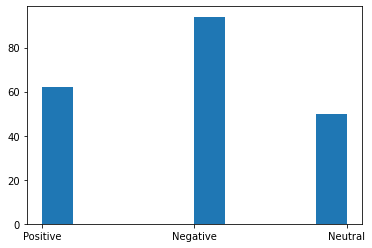

In [60]:
plt.figure()
plt.hist(data['manual_label'])
plt.show()

Terlihat hasil di atas yang menggunakan label manual, tweet negative sebanyak 94, positive sebanyak 62 dan neutral sebanyak 50.

In [28]:
data['lexicon_label'].value_counts()

Negative    80
Neutral     68
Positive    58
Name: lexicon_label, dtype: int64

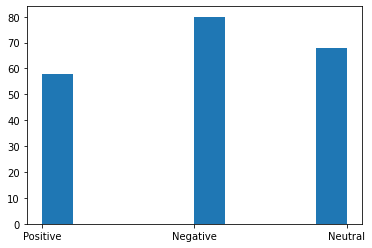

In [61]:
plt.figure()
plt.hist(data['lexicon_label'])
plt.show()

Setelah menggunakan lexicon-based ternyata hasil negative dan positive berkurang menjadi 80 dan 58, sementara hasil neutral bertambah menjadi 68

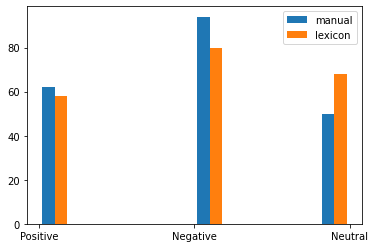

In [63]:
plt.hist([data['manual_label'], data['lexicon_label']], label=['manual', 'lexicon'])
plt.legend()
plt.show()

Perbandingan secara grafik dapat dilihat cara manual menghasilkan sentimen positif dan negatif yang lebih banyak dibandingkan lexicon, tetapi lexicon lebih banyak menghasilkan sentimen netral

### SVM Lexicon-Label

Data training 80% dan data testing 20%

In [29]:
lexicon_train_X, lexicon_test_X, lexicon_train_Y, lexicon_test_Y = model_selection.train_test_split(data['tweet'], data['lexicon_label'], test_size = 0.2, random_state = 0)

Dibuat dataframe baru yang berisi data lexicon training dan testing

In [30]:
lexicon_df_train80 = pd.DataFrame()
lexicon_df_train80['tweet'] = lexicon_train_X
lexicon_df_train80['lexicon_label'] = lexicon_train_Y

lexicon_df_test20 = pd.DataFrame()
lexicon_df_test20['tweet'] = lexicon_test_X
lexicon_df_test20['lexicon_label'] = lexicon_test_Y

In [31]:
lexicon_df_train80

,tweet,lexicon_label
71,jokowi andil besar kebangkitan neo partai komu...,Positive
134,terima kasih saksi bang munarman respect,Positive
145,program gagal program jokowi program berhasil ...,Neutral
122,bacanya kebalikan ya guys rahasia survei berar...,Negative
26,jafar shodiq gulingkan jokowi ntt papua buka s...,Neutral
83,menteri tenaga kerja jahat cair umur cebong ho...,Negative
149,jabatan susilo bambang yudhoyono selesai presi...,Negative
187,meminta jokowi,Negative
8,tidak hanya jual-beli tanah jokowi tekan atura...,Positive
90,oke oke menterinya jokowi tong tong one one ot...,Neutral


In [32]:
lexicon_df_test20

,tweet,lexicon_label
52,malam jokowi memanggil beberapa menteri menter...,Neutral
182,paham situ dibahas konteks menghafal bahas mas...,Negative
5,badan penyelenggara jaminan sosial kesehatan s...,Negative
18,hanya era rezim jokowi rakyat antre minyak-gor...,Neutral
189,terima kasih berkat pembangunan infrastrukur b...,Positive
171,ekonomi senior jokowi mundur mas rakyat sengsara,Negative
76,jokowi meminta aturan jahat direvisi jokower b...,Negative
154,minini realita negeri jangan malu jokowi news ...,Positive
104,demo sopir truk pemilik truk odol prambanan jo...,Neutral
33,menteri badan usaha milik negara menyebut bada...,Neutral


## TF IDF

In [33]:
# TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

lexicon_tfidf_vect_8020 = TfidfVectorizer(max_features = 5000)
lexicon_tfidf_vect_8020.fit(data['tweet'])
lexicon_train_X_tfidf_8020 = lexicon_tfidf_vect_8020.transform(lexicon_df_train80['tweet'])
lexicon_test_X_tfidf_8020 = lexicon_tfidf_vect_8020.transform(lexicon_df_test20['tweet'])


In [34]:
lexicon_tfidf_vect_8020

TfidfVectorizer(max_features=5000)

Hasil dari TF-IDF training

In [35]:
print(lexicon_train_X_tfidf_8020)

  (0, 1047)	0.25796689169680226
  (0, 743)	0.22626075585226202
  (0, 711)	0.38910924001544345
  (0, 654)	0.25796689169680226
  (0, 471)	0.45252151170452404
  (0, 414)	0.2394199911849753
  (0, 377)	0.07811620323624119
  (0, 357)	0.2394199911849753
  (0, 338)	0.2965633657027805
  (0, 332)	0.25796689169680226
  (0, 132)	0.25796689169680226
  (0, 113)	0.22626075585226202
  (0, 21)	0.25796689169680226
  (1, 980)	0.3673969731176012
  (1, 862)	0.4272708447227949
  (1, 847)	0.48714471632798856
  (1, 637)	0.3673969731176012
  (1, 405)	0.35722290539873186
  (1, 59)	0.4272708447227949
  (2, 815)	0.8711781323201565
  (2, 377)	0.07106040696776306
  (2, 355)	0.21779453308003913
  (2, 271)	0.21779453308003913
  (2, 229)	0.21779453308003913
  (2, 96)	0.23466619662435212
  :	:
  (162, 830)	0.19992925062523678
  (162, 809)	0.17704871056172491
  (162, 727)	0.33276924818424486
  (162, 603)	0.3088443247226612
  (162, 528)	0.29186932138194827
  (162, 458)	0.2321786750067254
  (162, 446)	0.2138776356015719
 

Hasil dari TF-IDF testing

In [36]:
print(lexicon_test_X_tfidf_8020)

  (0, 968)	0.18379737951971664
  (0, 804)	0.21983825902084567
  (0, 607)	0.6023531103123709
  (0, 548)	0.25064440424955425
  (0, 520)	0.21983825902084567
  (0, 477)	0.21983825902084567
  (0, 470)	0.21983825902084567
  (0, 446)	0.16109431039727098
  (0, 440)	0.19496676604082638
  (0, 411)	0.25064440424955425
  (0, 377)	0.07589884536577327
  (0, 339)	0.21983825902084567
  (0, 321)	0.25064440424955425
  (0, 117)	0.25064440424955425
  (0, 77)	0.20181781927028114
  (1, 918)	0.25767687200776235
  (1, 900)	0.23915082287838885
  (1, 698)	0.22600638183696656
  (1, 592)	0.5153537440155247
  (1, 533)	0.23915082287838885
  (1, 475)	0.5153537440155247
  (1, 306)	0.1943358916661707
  (1, 184)	0.25767687200776235
  (1, 57)	0.25767687200776235
  (1, 52)	0.25767687200776235
  :	:
  (38, 347)	0.3361087102475214
  (38, 338)	0.19319830094743354
  (38, 290)	0.44027166455036826
  (38, 81)	0.28149936804001313
  (38, 27)	0.2706333187169975
  (39, 968)	0.35607751427891415
  (39, 607)	0.29174028323835954
  (39,

In [37]:
print(lexicon_train_X_tfidf_8020.shape)
print(lexicon_test_X_tfidf_8020.shape)

(164, 1072)
(42, 1072)


In [38]:
print(lexicon_tfidf_vect_8020.vocabulary_)

{'jokowi': 377, 'mengesahkan': 585, 'peraturan': 767, 'wajib': 1052, 'badan': 46, 'penyelenggara': 763, 'jaminan': 365, 'sosial': 926, 'diterapkan': 218, 'aspek': 36, 'baik': 53, 'pengurusan': 755, 'surat': 943, 'santri': 871, 'sangat': 870, 'memilih': 556, 'erick': 256, 'thohir': 990, 'penerus': 746, 'presiden': 809, 'indonesia': 338, 'membutuhkan': 554, 'pemimpin': 738, 'fokus': 263, 'masalah': 533, 'bukan': 135, 'menteri': 607, 'pertahanan': 783, 'pendidikan': 742, 'kebudayaan': 418, 'agama': 6, 'tenaga': 968, 'kerja': 446, 'perdagangan': 769, 'srikandi': 929, 'bulutangkis': 137, 'putri': 825, 'mencetak': 569, 'sejarah': 881, 'meraih': 618, 'gelar': 281, 'juara': 382, 'kejuaraan': 429, 'asia': 34, 'beregu': 94, 'lombok': 510, 'mandalika': 524, 'circuit': 158, 'bangun': 63, 'nusantara': 668, 'kesehatan': 447, 'syarat': 949, 'jual': 381, 'beli': 81, 'tanah': 957, 'partai': 711, 'kebangkitan': 414, 'bangsa': 62, 'curiga': 166, 'penyusup': 764, 'jahat': 360, 'diktator': 198, 'sebenarnya

### SVM

In [39]:
from sklearn.svm import SVC

lexicon_model = SVC(kernel='linear')
lexicon_model.fit(lexicon_train_X_tfidf_8020,lexicon_train_Y)

SVC(kernel='linear')

In [40]:
from sklearn.metrics import accuracy_score

lexicon_predictions_SVM_8020 = lexicon_model.predict(lexicon_test_X_tfidf_8020)
lexicon_test_prediction_8020 = pd.DataFrame()
lexicon_test_prediction_8020['Sentiment'] = lexicon_test_X
lexicon_test_prediction_8020['Label'] = lexicon_predictions_SVM_8020
lexicon_SVM_accuracy_8020 = accuracy_score(lexicon_predictions_SVM_8020, lexicon_test_Y)*100
lexicon_SVM_accuracy_8020 = round(lexicon_SVM_accuracy_8020,1)

In [41]:
lexicon_test_prediction_8020

,Sentiment,Label
52,malam jokowi memanggil beberapa menteri menter...,Negative
182,paham situ dibahas konteks menghafal bahas mas...,Negative
5,badan penyelenggara jaminan sosial kesehatan s...,Positive
18,hanya era rezim jokowi rakyat antre minyak-gor...,Negative
189,terima kasih berkat pembangunan infrastrukur b...,Positive
171,ekonomi senior jokowi mundur mas rakyat sengsara,Negative
76,jokowi meminta aturan jahat direvisi jokower b...,Negative
154,minini realita negeri jangan malu jokowi news ...,Neutral
104,demo sopir truk pemilik truk odol prambanan jo...,Neutral
33,menteri badan usaha milik negara menyebut bada...,Neutral


In [42]:
lexicon_SVM_accuracy_8020

61.9

Akurasi menggunakan model SVM sebesar 61.9%

In [43]:
from sklearn.metrics import classification_report

print ("\nHere is the classification report:") 
print (classification_report(lexicon_test_Y, lexicon_predictions_SVM_8020))


Here is the classification report:
              precision    recall  f1-score   support

    Negative       0.67      0.80      0.73        20
     Neutral       0.44      0.31      0.36        13
    Positive       0.67      0.67      0.67         9

    accuracy                           0.62        42
   macro avg       0.59      0.59      0.59        42
weighted avg       0.60      0.62      0.60        42



### SVM manual_label

Sama seperti lexicon_label, training 80% dan testing 20%

In [44]:
manual_train_X, manual_test_X, manual_train_Y, manual_test_Y = model_selection.train_test_split(data['tweet'], data['manual_label'], test_size = 0.2, random_state = 0)

Dimasukkan ke dalam dataframe baru untuk menampung data yang sudah dibagi

In [45]:
manual_df_train80 = pd.DataFrame()
manual_df_train80['tweet'] = manual_train_X
manual_df_train80['manual_label'] = manual_train_Y

manual_df_test20 = pd.DataFrame()
manual_df_test20['tweet'] = manual_test_X
manual_df_test20['manual_label'] = manual_test_Y

In [46]:
manual_df_train80

,tweet,manual_label
71,jokowi andil besar kebangkitan neo partai komu...,Negative
134,terima kasih saksi bang munarman respect,Neutral
145,program gagal program jokowi program berhasil ...,Positive
122,bacanya kebalikan ya guys rahasia survei berar...,Negative
26,jafar shodiq gulingkan jokowi ntt papua buka s...,Negative
83,menteri tenaga kerja jahat cair umur cebong ho...,Negative
149,jabatan susilo bambang yudhoyono selesai presi...,Neutral
187,meminta jokowi,Neutral
8,tidak hanya jual-beli tanah jokowi tekan atura...,Negative
90,oke oke menterinya jokowi tong tong one one ot...,Negative


In [47]:
manual_df_test20

,tweet,manual_label
52,malam jokowi memanggil beberapa menteri menter...,Neutral
182,paham situ dibahas konteks menghafal bahas mas...,Negative
5,badan penyelenggara jaminan sosial kesehatan s...,Negative
18,hanya era rezim jokowi rakyat antre minyak-gor...,Negative
189,terima kasih berkat pembangunan infrastrukur b...,Positive
171,ekonomi senior jokowi mundur mas rakyat sengsara,Negative
76,jokowi meminta aturan jahat direvisi jokower b...,Negative
154,minini realita negeri jangan malu jokowi news ...,Negative
104,demo sopir truk pemilik truk odol prambanan jo...,Negative
33,menteri badan usaha milik negara menyebut bada...,Positive


### TF-IDF

In [48]:
# TF-IDF

from sklearn.feature_extraction.text import TfidfVectorizer

manual_tfidf_vect_8020 = TfidfVectorizer(max_features = 5000)
manual_tfidf_vect_8020.fit(data['tweet'])
manual_train_X_tfidf_8020 = manual_tfidf_vect_8020.transform(manual_df_train80['tweet'])
manual_test_X_tfidf_8020 = manual_tfidf_vect_8020.transform(manual_df_test20['tweet'])


In [49]:
manual_tfidf_vect_8020

TfidfVectorizer(max_features=5000)

In [50]:
print(manual_train_X_tfidf_8020)

  (0, 1047)	0.25796689169680226
  (0, 743)	0.22626075585226202
  (0, 711)	0.38910924001544345
  (0, 654)	0.25796689169680226
  (0, 471)	0.45252151170452404
  (0, 414)	0.2394199911849753
  (0, 377)	0.07811620323624119
  (0, 357)	0.2394199911849753
  (0, 338)	0.2965633657027805
  (0, 332)	0.25796689169680226
  (0, 132)	0.25796689169680226
  (0, 113)	0.22626075585226202
  (0, 21)	0.25796689169680226
  (1, 980)	0.3673969731176012
  (1, 862)	0.4272708447227949
  (1, 847)	0.48714471632798856
  (1, 637)	0.3673969731176012
  (1, 405)	0.35722290539873186
  (1, 59)	0.4272708447227949
  (2, 815)	0.8711781323201565
  (2, 377)	0.07106040696776306
  (2, 355)	0.21779453308003913
  (2, 271)	0.21779453308003913
  (2, 229)	0.21779453308003913
  (2, 96)	0.23466619662435212
  :	:
  (162, 830)	0.19992925062523678
  (162, 809)	0.17704871056172491
  (162, 727)	0.33276924818424486
  (162, 603)	0.3088443247226612
  (162, 528)	0.29186932138194827
  (162, 458)	0.2321786750067254
  (162, 446)	0.2138776356015719
 

In [51]:
print(manual_test_X_tfidf_8020)

  (0, 968)	0.18379737951971664
  (0, 804)	0.21983825902084567
  (0, 607)	0.6023531103123709
  (0, 548)	0.25064440424955425
  (0, 520)	0.21983825902084567
  (0, 477)	0.21983825902084567
  (0, 470)	0.21983825902084567
  (0, 446)	0.16109431039727098
  (0, 440)	0.19496676604082638
  (0, 411)	0.25064440424955425
  (0, 377)	0.07589884536577327
  (0, 339)	0.21983825902084567
  (0, 321)	0.25064440424955425
  (0, 117)	0.25064440424955425
  (0, 77)	0.20181781927028114
  (1, 918)	0.25767687200776235
  (1, 900)	0.23915082287838885
  (1, 698)	0.22600638183696656
  (1, 592)	0.5153537440155247
  (1, 533)	0.23915082287838885
  (1, 475)	0.5153537440155247
  (1, 306)	0.1943358916661707
  (1, 184)	0.25767687200776235
  (1, 57)	0.25767687200776235
  (1, 52)	0.25767687200776235
  :	:
  (38, 347)	0.3361087102475214
  (38, 338)	0.19319830094743354
  (38, 290)	0.44027166455036826
  (38, 81)	0.28149936804001313
  (38, 27)	0.2706333187169975
  (39, 968)	0.35607751427891415
  (39, 607)	0.29174028323835954
  (39,

Data training sebanyak 164 dan data testing sebanyak 42

In [52]:
print(manual_train_X_tfidf_8020.shape)
print(manual_test_X_tfidf_8020.shape)

(164, 1072)
(42, 1072)


In [53]:
print(manual_tfidf_vect_8020.vocabulary_)

{'jokowi': 377, 'mengesahkan': 585, 'peraturan': 767, 'wajib': 1052, 'badan': 46, 'penyelenggara': 763, 'jaminan': 365, 'sosial': 926, 'diterapkan': 218, 'aspek': 36, 'baik': 53, 'pengurusan': 755, 'surat': 943, 'santri': 871, 'sangat': 870, 'memilih': 556, 'erick': 256, 'thohir': 990, 'penerus': 746, 'presiden': 809, 'indonesia': 338, 'membutuhkan': 554, 'pemimpin': 738, 'fokus': 263, 'masalah': 533, 'bukan': 135, 'menteri': 607, 'pertahanan': 783, 'pendidikan': 742, 'kebudayaan': 418, 'agama': 6, 'tenaga': 968, 'kerja': 446, 'perdagangan': 769, 'srikandi': 929, 'bulutangkis': 137, 'putri': 825, 'mencetak': 569, 'sejarah': 881, 'meraih': 618, 'gelar': 281, 'juara': 382, 'kejuaraan': 429, 'asia': 34, 'beregu': 94, 'lombok': 510, 'mandalika': 524, 'circuit': 158, 'bangun': 63, 'nusantara': 668, 'kesehatan': 447, 'syarat': 949, 'jual': 381, 'beli': 81, 'tanah': 957, 'partai': 711, 'kebangkitan': 414, 'bangsa': 62, 'curiga': 166, 'penyusup': 764, 'jahat': 360, 'diktator': 198, 'sebenarnya

### SVM

In [54]:
from sklearn.svm import SVC

manual_model = SVC(kernel='linear')
manual_model.fit(manual_train_X_tfidf_8020,manual_train_Y)

SVC(kernel='linear')

In [55]:
from sklearn.metrics import accuracy_score

manual_predictions_SVM_8020 = manual_model.predict(manual_test_X_tfidf_8020)
manual_test_prediction_8020 = pd.DataFrame()
manual_test_prediction_8020['Sentiment'] = manual_test_X
manual_test_prediction_8020['Label'] = manual_predictions_SVM_8020
manual_SVM_accuracy_8020 = accuracy_score(manual_predictions_SVM_8020, manual_test_Y)*100
manual_SVM_accuracy_8020 = round(manual_SVM_accuracy_8020,1)

In [56]:
manual_test_prediction_8020

,Sentiment,Label
52,malam jokowi memanggil beberapa menteri menter...,Negative
182,paham situ dibahas konteks menghafal bahas mas...,Negative
5,badan penyelenggara jaminan sosial kesehatan s...,Negative
18,hanya era rezim jokowi rakyat antre minyak-gor...,Negative
189,terima kasih berkat pembangunan infrastrukur b...,Positive
171,ekonomi senior jokowi mundur mas rakyat sengsara,Negative
76,jokowi meminta aturan jahat direvisi jokower b...,Negative
154,minini realita negeri jangan malu jokowi news ...,Negative
104,demo sopir truk pemilik truk odol prambanan jo...,Negative
33,menteri badan usaha milik negara menyebut bada...,Positive


In [57]:
manual_SVM_accuracy_8020

76.2

Hasil akurasi berbeda dari lexicon label, akurasinya naik menjadi 76.2%

In [58]:
from sklearn.metrics import classification_report

print ("\nHere is the classification report:") 
print (classification_report(manual_test_Y, manual_predictions_SVM_8020))


Here is the classification report:
              precision    recall  f1-score   support

    Negative       0.72      0.96      0.82        24
     Neutral       1.00      0.33      0.50         6
    Positive       0.88      0.58      0.70        12

    accuracy                           0.76        42
   macro avg       0.86      0.62      0.67        42
weighted avg       0.80      0.76      0.74        42

